In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
# from tqdm import

In [2]:
connectivity_min, connectivity_max = 0.1,65
# random_input_span = (1.2,2.8)
random_input_span = (9.5,13.5)
total_time = 100
alpha = 20
alpha_folder = 'alpha_' + str(alpha)

current_models = ['IF','Rotational']
neuron_model = current_models[1]

model_folder_name = neuron_model+'_ensembles'

# Capture related ensembles

In [3]:
def list_folders_in_path(path):
    return [ name for name in os.listdir( path ) if os.path.isdir( os.path.join(path, name) ) ]

In [4]:
num_neurons = 10000
target_networks_name = 'N{}_T{}_I{}_{}'.format(num_neurons,total_time,random_input_span[0],random_input_span[1])
target_path = os.path.join(model_folder_name,target_networks_name)
all_g_folders = list_folders_in_path(target_path)
desired_g_folders = all_g_folders

# delay_folder_name = 'd_{}'.format(delay)

In [5]:
sigma_glossary_dict = {}
amin_saman_param_glossary_dict = {}
field_period_glossary_dict = {}

In [6]:
for g_folder in desired_g_folders:
    available_d_folders = list_folders_in_path(os.path.join(target_path,g_folder))

    g = float( g_folder.split('_')[1] ) #folder names are g_# d_#
    
    sigma_glossary_dict[g] = {}
    amin_saman_param_glossary_dict[g] = {}
    field_period_glossary_dict[g] = {}
    
    for d_folder in available_d_folders:
        delay = float( d_folder.split('_')[1] ) #folder names are d_#
        
        g_d_alpha_path = os.path.join(target_path, g_folder, d_folder, alpha_folder)

        try:
            g_ensembles_list = list_folders_in_path(g_d_alpha_path)
            
            sigma_glossary_dict[g].update( {delay:[]} )
            amin_saman_param_glossary_dict[g].update( {delay:[]} )
            field_period_glossary_dict[g].update( {delay:[]} )
        except: #if the given connectivity and delay has not been measured even once
            continue

        for ensemble_num in g_ensembles_list:
            ensemble_path = os.path.join(g_d_alpha_path, ensemble_num)
            with open( os.path.join(ensemble_path,'sigma.txt') ) as file:
                sigma = float( file.readline() )
                sigma_glossary_dict[g][delay].append( sigma )

            with open( os.path.join(ensemble_path,'field_period.txt') ) as file:
                field_period = float( file.readline() )
                field_period_glossary_dict[g][delay].append( field_period )                

            if neuron_model == 'Rotational': #if not does not exist
                with open( os.path.join(ensemble_path,'amin_saman_param.txt') ) as file:
                    amin_saman_param = float( file.readline() )        
                    amin_saman_param_glossary_dict[g][delay].append( amin_saman_param )        


        sigma_glossary_dict[g][delay] = np.mean(sigma_glossary_dict[g][delay])
        field_period_glossary_dict[g][delay] = np.mean(field_period_glossary_dict[g][delay])
        if neuron_model == 'Rotational':amin_saman_param_glossary_dict[g][delay] = np.mean(amin_saman_param_glossary_dict[g][delay])


# Sigma dataframe

In [7]:
sigma_table = pd.DataFrame.from_dict(sigma_glossary_dict)
sigma_table.index.name = 'delay'
sigma_table.columns.name = 'connectivity'
sigma_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.167397,0.167703,0.166560,0.167300,0.168236,0.168951,0.168532,0.169853,0.170327,0.170724
0.07,0.196108,0.196048,0.197971,0.199343,0.200176,0.202356,0.206826,0.239996,0.278363,0.290256
0.09,0.207894,0.210955,0.214736,0.215960,0.220186,0.324162,0.348897,0.359965,0.364062,0.365664
0.11,0.211869,0.213379,0.219637,0.326782,0.385350,0.402744,0.409853,0.413384,0.412386,0.410723
0.13,0.219937,0.221727,0.353210,0.425955,0.440675,0.448705,0.449652,0.449918,0.450398,0.447071
0.15,0.241189,0.258591,0.447456,0.471556,0.484383,0.504835,0.509168,0.499913,0.493612,0.485238
0.17,0.232047,0.387951,0.474556,0.494194,0.502630,0.506046,0.507264,0.506645,0.505436,0.506689
0.19,0.233190,0.479413,0.519023,0.528043,0.530866,0.532306,0.531871,0.534258,0.537114,0.540777
0.21,0.245053,0.512514,0.538059,0.549088,0.552633,0.550326,0.554656,0.561475,0.570672,0.572820


Text(0.5, 1, 'Sigma as an Order parameter')

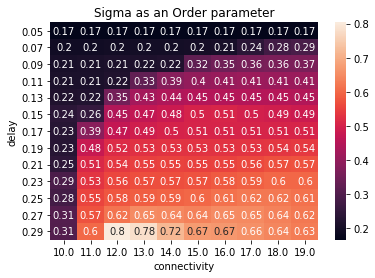

In [8]:
ax_sigma = sns.heatmap(sigma_table, annot=True)
ax_sigma.set_title('Sigma as an Order parameter')

# Field period dataframe

In [9]:
field_period_table = pd.DataFrame.from_dict(field_period_glossary_dict)
field_period_table.index.name = 'delay'
field_period_table.columns.name = 'connectivity'
field_period_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.409013,0.427350,0.440665,0.358428,0.386860,0.404865,0.410679,0.435782,0.413146,0.385369
0.07,0.373837,0.385942,0.432900,0.440563,0.460869,0.354002,0.305350,0.310571,0.319518,0.318471
0.09,0.418439,0.437639,0.352735,0.362319,0.352823,0.367033,0.370370,0.378793,0.390625,0.387603
0.11,0.429216,0.446464,0.430971,0.399203,0.415802,0.428267,0.440529,0.449440,0.460829,0.470591
0.13,0.452498,0.465116,0.442478,0.464060,0.473934,0.493830,0.502513,0.515464,0.396137,0.543494
0.15,0.476201,0.493830,0.501256,0.520833,0.539119,0.844284,0.309329,0.493486,0.606061,0.927843
0.17,0.527708,0.531915,0.552486,0.573108,0.595238,0.617284,0.638984,0.653595,0.675676,0.525707
0.19,0.563492,0.584795,0.640449,0.632911,0.653595,0.675676,0.714614,0.366300,0.575455,0.800000
0.21,0.618132,0.632911,0.671413,0.709220,0.714286,0.743505,0.772304,0.816340,0.641943,0.892857


Text(0.5, 1, 'Field period time')

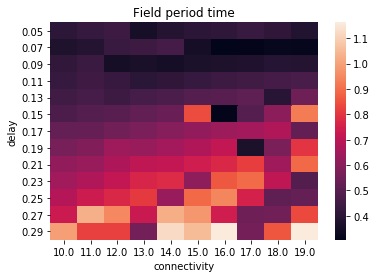

In [10]:
ax_field_period = sns.heatmap(field_period_table, annot=False)
ax_field_period.set_title('Field period time')

# Amin Saman Parameter

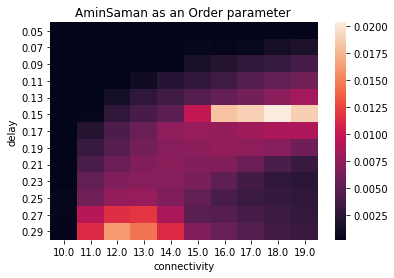

In [11]:
if neuron_model == 'Rotational':
    amin_saman_param_table = pd.DataFrame.from_dict(amin_saman_param_glossary_dict)
    amin_saman_param_table.index.name = 'delay'
    amin_saman_param_table.columns.name = 'connectivity'
    ax_field_period = sns.heatmap(amin_saman_param_table)
    ax_field_period.set_title('AminSaman as an Order parameter ')